# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import folium
from folium import plugins
from shapely import wkt
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Source-Paths
- To run the code, assign the path, where you store the data, to your name as a variable.
- Then replace the user with your own name.

In [2]:
michael = "C:/Users/micha/Documents/1_Wirtschaftsinformatik/4. Semester/Data Science & Machine Learning/Gruppenprojekt/"
martin = "C:/Users/mbirk/OneDrive/Uni/Semester_4/DSML/YMMMMY/YMMMMY_repository/data/"
yannick = "C:/Users/Yannick Herrmann/Documents/Uni/DSML/Data/"

user = martin

ride_source= user + "2019_05.csv"
weather_source= user + "weather.csv"
census_tract_source= user + "census_tract_characteristics.csv"

Reading the Data


In [3]:
ride = pd.read_csv(ride_source)
weather = pd.read_csv(weather_source)
census_tract = pd.read_csv(census_tract_source)

# Raw Data

In [4]:
ride.head()

Trip ID Trip Miles Trip Start Timestamp  \
0  001ab3a53a4f74430d2a9aae216fed703244cfc9        1.5  2019-05-01 00:00:00   
1  01080eb6fc1bd9ec70e3fd8a2a56345754b92332        5.7  2019-05-01 00:00:00   
2  015aeacaa25560b04a0dfc6a48f95a820f9a22f6        0.7  2019-05-01 00:00:00   
3  01aded4891f4d76040f68a15730afcb5003b70ea        2.7  2019-05-01 00:00:00   
4  023ea4b576bf41415848e32b5fc4fae7d49e4cca        0.7  2019-05-01 00:00:00   

    Trip End Timestamp  Pickup Census Tract  \
0  2019-05-01 00:00:00         1.703183e+10   
1  2019-05-01 00:15:00         1.703108e+10   
2  2019-05-01 00:15:00         1.703133e+10   
3  2019-05-01 00:15:00         1.703128e+10   
4  2019-05-01 00:00:00         1.703128e+10   

               Pickup Centroid Location  Dropoff Census Tract  \
0  POINT (-87.6542980837 41.9462945357)          1.703106e+10   
1  POINT (-87.6288741572 41.8920726347)          1.703183e+10   
2   POINT (-87.6173580061 41.859349715)          1.703184e+10   
3   POINT (-87.642648998 41.8792550844)          1.703108e+10   
4  POINT (-87.6428084655 41.8853000224)          1.703184e+10   

              Dropoff Centroid Location  Shared Trip Authorized  Trips Pooled  \
0   POINT (-87.671518011 41.9579038971)                   False             1   
1  POINT (-87.6542980837 41.9462945357)                    True             2   
2  POINT (-87.6314065252 41.8710158803)                   False             1   
3  POINT (-87.6318639497 41.8920421365)                   False             1   
4  POINT (-87.6327464887 41.8809944707)                   False             1   

   Trip Total  Fare  Additional Charges  Tip  
0        5.05   2.5                2.55    0  
1        8.22   7.5                0.72    0  
2        5.05   2.5                2.55    0  
3       10.05   7.5                2.55    0  
4        7.55   5.0                2.55    0

In [5]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Trip ID                    object 
 1   Trip Miles                 object 
 2   Trip Start Timestamp       object 
 3   Trip End Timestamp         object 
 4   Pickup Census Tract        float64
 5   Pickup Centroid Location   object 
 6   Dropoff Census Tract       float64
 7   Dropoff Centroid Location  object 
 8   Shared Trip Authorized     bool   
 9   Trips Pooled               int64  
 10  Trip Total                 float64
 11  Fare                       float64
 12  Additional Charges         float64
 13  Tip                        int64  
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 648.2+ MB


In [6]:
weather.head()

date  wind  precipitation  avg_temp
0  2018-10-01   3.2           39.6      16.0
1  2018-10-02   2.3            0.3      16.7
2  2018-10-03   6.2            0.0      20.9
3  2018-10-04   7.2            1.0      18.8
4  2018-10-05   3.2           31.5      14.1

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           548 non-null    object 
 1   wind           548 non-null    float64
 2   precipitation  548 non-null    float64
 3   avg_temp       548 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.3+ KB


In [8]:
census_tract.head()

ID  population  households  share_female  median_age  \
0  17031010100        4522        2316         0.491        35.3   
1  17031010201        7039        2688         0.474        36.3   
2  17031010202        2852        1102         0.513        35.7   
3  17031010300        6650        3037         0.505        41.6   
4  17031010400        5153        1938         0.533        25.2   

   share_over_65  avg_household_size  share_bachelor_degree_or_higher  \
0          0.056                1.89                            0.469   
1          0.066                2.55                            0.308   
2          0.134                2.30                            0.333   
3          0.188                1.87                            0.394   
4          0.066                1.86                            0.655   

   unemployment_rate  share_income_below_poverty_level  
0              0.070                             0.358  
1              0.073                             0.368  
2              0.065                             0.185  
3              0.049                             0.161  
4              0.077                             0.191

In [9]:
census_tract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                798 non-null    int64  
 1   population                        798 non-null    int64  
 2   households                        798 non-null    int64  
 3   share_female                      798 non-null    float64
 4   median_age                        798 non-null    float64
 5   share_over_65                     798 non-null    float64
 6   avg_household_size                798 non-null    float64
 7   share_bachelor_degree_or_higher   798 non-null    float64
 8   unemployment_rate                 798 non-null    float64
 9   share_income_below_poverty_level  798 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 62.5 KB


Check for missing values

In [10]:
print(ride.isnull().sum())

Trip ID                      0
Trip Miles                   0
Trip Start Timestamp         0
Trip End Timestamp           0
Pickup Census Tract          0
Pickup Centroid Location     0
Dropoff Census Tract         0
Dropoff Centroid Location    0
Shared Trip Authorized       0
Trips Pooled                 0
Trip Total                   0
Fare                         0
Additional Charges           0
Tip                          0
dtype: int64


In [11]:
print(weather.isnull().sum())

date             0
wind             0
precipitation    0
avg_temp         0
dtype: int64


In [12]:
print(census_tract.isnull().sum())

ID                                  0
population                          0
households                          0
share_female                        0
median_age                          0
share_over_65                       0
avg_household_size                  0
share_bachelor_degree_or_higher     0
unemployment_rate                   0
share_income_below_poverty_level    0
dtype: int64


Deep Copy

In [13]:
rawRides = ride.copy(deep = True)
rawWeather = weather.copy(deep = True)
rawCensusTract = census_tract.copy(deep = True)

Check Data-Types

In [14]:
rawRides.dtypes

Trip ID                       object
Trip Miles                    object
Trip Start Timestamp          object
Trip End Timestamp            object
Pickup Census Tract          float64
Pickup Centroid Location      object
Dropoff Census Tract         float64
Dropoff Centroid Location     object
Shared Trip Authorized          bool
Trips Pooled                   int64
Trip Total                   float64
Fare                         float64
Additional Charges           float64
Tip                            int64
dtype: object

In [15]:
rawWeather.dtypes

date              object
wind             float64
precipitation    float64
avg_temp         float64
dtype: object

In [16]:
rawCensusTract.dtypes

ID                                    int64
population                            int64
households                            int64
share_female                        float64
median_age                          float64
share_over_65                       float64
avg_household_size                  float64
share_bachelor_degree_or_higher     float64
unemployment_rate                   float64
share_income_below_poverty_level    float64
dtype: object

Convert dtype time in rawRides and rawWeather to datetime

In [17]:
updatedRides = rawRides.copy(deep = True)
updatedWeather = rawWeather.copy(deep = True)

In [18]:
updatedRides["Trip Start Timestamp"] = pd.to_datetime(updatedRides["Trip Start Timestamp"])
updatedRides["Trip End Timestamp"] = pd.to_datetime(updatedRides["Trip End Timestamp"])
updatedWeather["date"] = pd.to_datetime(updatedWeather["date"])

Confirm conversion

In [19]:
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [20]:
updatedWeather.dtypes

date             datetime64[ns]
wind                    float64
precipitation           float64
avg_temp                float64
dtype: object

Insert 'Date' column


In [21]:
only_date = updatedRides["Trip Start Timestamp"]
updatedRides.insert(2, "Date", only_date)
updatedRides["Date"] =  updatedRides["Date"].dt.date
updatedRides["Date"] =  pd.to_datetime(updatedRides["Date"])
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Date                         datetime64[ns]
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

Add suffix _pickup & _dropoff

In [22]:
updatetCensusTract_pickup = rawCensusTract.rename(columns={'ID': 'Census Tract ID_pickup',
                                                    'population': 'population_pickup',
                                                    'households': 'households_pickup',
                                                    'share_female': 'share_female_pickup',
                                                    'median_age': 'median_age_pickup',
                                                    'share_over_65': 'share_over_65_pickup',
                                                    'avg_household_size': 'avg_household_size_pickup',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_pickup',
                                                    'unemployment_rate': 'unemployment_rate_pickup',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_pickup'}, inplace=False)
updatetCensusTract_dropoff = rawCensusTract.rename(columns={'ID': 'Census Tract ID_dropoff',
                                                    'population': 'population_dropoff',
                                                    'households': 'households_dropoff',
                                                    'share_female': 'share_female_dropoff',
                                                    'median_age': 'median_age_dropoff',
                                                    'share_over_65': 'share_over_65_dropoff',
                                                    'avg_household_size': 'avg_household_dropoff',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_dropoff',
                                                    'unemployment_rate': 'unemployment_rate_dropoff',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_dropoff'}, inplace=False)

# Join Data


In [23]:
combined_data = updatedRides.merge(updatedWeather,how="left", left_on="Date", right_on="date")
combined_data = combined_data.merge(
    updatetCensusTract_pickup,
    left_on='Pickup Census Tract',
    right_on='Census Tract ID_pickup',
    how='left')
combined_data = combined_data.merge(
    updatetCensusTract_dropoff,
    left_on='Dropoff Census Tract',
    right_on='Census Tract ID_dropoff',
    how='left')

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                object        
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

# Errors in Trip Miles

Convert Trip Miles to float


In [24]:
combined_data['Trip Miles'] = combined_data['Trip Miles'].str.replace(' mi', '', regex=False)
combined_data['Trip Miles'] = pd.to_numeric(combined_data['Trip Miles'])

Check conversion

In [25]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                float64       
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

Negative Values

- Some values of 'Trip Miles' are negative
- Since driving negative miles is impossible we check if only the sign is wrong.

In [26]:
# average fare / mile (positive Trip Miles)
positiveTripMiles = combined_data[(combined_data['Trip Miles'] > 0) & (combined_data['Fare'])]
positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
avgCostMilePos = positiveTripMiles['averageTripCost'].mean()

# average fare / mile (negative Trip Miles)
negativeTripMiles = combined_data[(combined_data['Trip Miles'] <0) & (combined_data['Fare'])]
negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']
avgCostMileNeg = negativeTripMiles['averageTripCost'].mean()

print(avgCostMilePos)
print(avgCostMileNeg)

3.3907753381253616
-3.393281715247924


C:\Users\mbirk\AppData\Local\Temp\ipykernel_143628\437582233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
C:\Users\mbirk\AppData\Local\Temp\ipykernel_143628\437582233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']


- Since the cost per mile is the same, we will use the absolute values.


In [27]:
combined_data['Trip Miles'] = combined_data['Trip Miles'].abs()


- Prove that the overall cost per mile remains the same:


In [28]:
costTripMiles = combined_data[(combined_data['Trip Miles']>0) & (combined_data['Fare'])]
costTripMiles['averageTripCost'] = costTripMiles['Fare']/costTripMiles['Trip Miles']
avgCostMile = costTripMiles['averageTripCost'].mean()
print(avgCostMile)

3.390813783707576


C:\Users\mbirk\AppData\Local\Temp\ipykernel_143628\1090862435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costTripMiles['averageTripCost'] = costTripMiles['Fare']/costTripMiles['Trip Miles']


# Add column Tip Binary


In [29]:
tip_binary = (combined_data['Tip'] > 0).astype(int)
combined_data.insert(1, "Tip Binary", tip_binary)

# Add weekdays


In [30]:
combined_data['Weekday'] = combined_data['Date'].dt.weekday
# map weekdays to actual names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
combined_data['Weekday_Name'] = combined_data['Weekday'].map(weekday_names)
# one-hot encoding of weekdays
dummies = pd.get_dummies(combined_data['Weekday_Name'], drop_first=True)
combined_data = pd.concat([combined_data, dummies], axis = 1)
combined_data.drop(['Weekday_Name'], axis=1, inplace=True)
combined_data.head()

Trip ID  Tip Binary  Trip Miles  \
0  001ab3a53a4f74430d2a9aae216fed703244cfc9           0         1.5   
1  01080eb6fc1bd9ec70e3fd8a2a56345754b92332           0         5.7   
2  015aeacaa25560b04a0dfc6a48f95a820f9a22f6           0         0.7   
3  01aded4891f4d76040f68a15730afcb5003b70ea           0         2.7   
4  023ea4b576bf41415848e32b5fc4fae7d49e4cca           0         0.7   

        Date Trip Start Timestamp  Trip End Timestamp  Pickup Census Tract  \
0 2019-05-01           2019-05-01 2019-05-01 00:00:00         1.703183e+10   
1 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703108e+10   
2 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703133e+10   
3 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703128e+10   
4 2019-05-01           2019-05-01 2019-05-01 00:00:00         1.703128e+10   

               Pickup Centroid Location  Dropoff Census Tract  \
0  POINT (-87.6542980837 41.9462945357)          1.703106e+10   
1  POINT (-87.6288741572 41.8920726347)          1.703183e+10   
2   POINT (-87.6173580061 41.859349715)          1.703184e+10   
3   POINT (-87.642648998 41.8792550844)          1.703108e+10   
4  POINT (-87.6428084655 41.8853000224)          1.703184e+10   

              Dropoff Centroid Location  ...  \
0   POINT (-87.671518011 41.9579038971)  ...   
1  POINT (-87.6542980837 41.9462945357)  ...   
2  POINT (-87.6314065252 41.8710158803)  ...   
3  POINT (-87.6318639497 41.8920421365)  ...   
4  POINT (-87.6327464887 41.8809944707)  ...   

   share_bachelor_degree_or_higher_dropoff  unemployment_rate_dropoff  \
0                                    0.742                      0.029   
1                                    0.774                      0.040   
2                                    0.755                      0.039   
3                                    0.882                      0.046   
4                                    0.759                      0.055   

   share_income_below_poverty_level_dropoff  Weekday  Monday  Saturday Sunday  \
0                                     0.153        2   False     False  False   
1                                     0.121        2   False     False  False   
2                                     0.167        2   False     False  False   
3                                     0.072        2   False     False  False   
4                                     0.114        2   False     False  False   

   Thursday  Tuesday  Wednesday  
0     False    False       True  
1     False    False       True  
2     False    False       True  
3     False    False       True  
4     False    False       True  

[5 rows x 47 columns]

In [31]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 47 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Tip Binary                                int32         
 2   Trip Miles                                float64       
 3   Date                                      datetime64[ns]
 4   Trip Start Timestamp                      datetime64[ns]
 5   Trip End Timestamp                        datetime64[ns]
 6   Pickup Census Tract                       float64       
 7   Pickup Centroid Location                  object        
 8   Dropoff Census Tract                      float64       
 9   Dropoff Centroid Location                 object        
 10  Shared Trip Authorized                    bool          
 11  Trips Pooled                              int64         
 12  Trip Total    

# Drop unusable data for visualization
- Visualization without Geo-Data

In [32]:
combined_data_copy = combined_data.copy()
usableData = combined_data_copy.drop(columns=['Trip ID','Pickup Centroid Location','Dropoff Centroid Location'])

- Visualization with Geo-Data


In [33]:
combined_data_copy2 = combined_data.copy()
combined_data_copy2 = combined_data_copy2[["Trip ID","Pickup Centroid Location", "Dropoff Centroid Location", "Tip Binary"]]
combined_data_copy2

Trip ID  \
0        001ab3a53a4f74430d2a9aae216fed703244cfc9   
1        01080eb6fc1bd9ec70e3fd8a2a56345754b92332   
2        015aeacaa25560b04a0dfc6a48f95a820f9a22f6   
3        01aded4891f4d76040f68a15730afcb5003b70ea   
4        023ea4b576bf41415848e32b5fc4fae7d49e4cca   
...                                           ...   
6473071  fe2f04bc1b4ea3aded8a78658cc8edd323338a5e   
6473072  feb856490a4b0347d969f12e4441e156c2d95c02   
6473073  fed64aeed4f1adec33181fc45293e89e67ef4c57   
6473074  feed29ad09ef0ab559ffb5fd43323aaf3db0b55d   
6473075  ff0382063dc02bb181fdbad320456c4ec90c2399   

                     Pickup Centroid Location  \
0        POINT (-87.6542980837 41.9462945357)   
1        POINT (-87.6288741572 41.8920726347)   
2         POINT (-87.6173580061 41.859349715)   
3         POINT (-87.642648998 41.8792550844)   
4        POINT (-87.6428084655 41.8853000224)   
...                                       ...   
6473071  POINT (-87.6209929134 41.8849871918)   
6473072   POINT (-87.6173580061 41.859349715)   
6473073  POINT (-87.6542980837 41.9462945357)   
6473074  POINT (-87.6572331997 41.8852813201)   
6473075  POINT (-87.6378442095 41.8932163595)   

                    Dropoff Centroid Location  Tip Binary  
0         POINT (-87.671518011 41.9579038971)           0  
1        POINT (-87.6542980837 41.9462945357)           0  
2        POINT (-87.6314065252 41.8710158803)           0  
3        POINT (-87.6318639497 41.8920421365)           0  
4        POINT (-87.6327464887 41.8809944707)           0  
...                                       ...         ...  
6473071  POINT (-87.6572331997 41.8852813201)           0  
6473072  POINT (-87.6661106945 41.9360865352)           0  
6473073  POINT (-87.7038545435 41.9357064711)           0  
6473074   POINT (-87.630963601 41.9094956686)           0  
6473075   POINT (-87.681993542 41.9833308063)           0  

[6473076 rows x 4 columns]

# Correlation


In [34]:
usableData.corr()

Tip Binary  Trip Miles      Date  \
Tip Binary                                  1.000000    0.080023 -0.000614   
Trip Miles                                  0.080023    1.000000  0.000522   
Date                                       -0.000614    0.000522  1.000000   
Trip Start Timestamp                       -0.000605    0.000483  1.000000   
Trip End Timestamp                          0.004055    0.003670  0.018240   
Pickup Census Tract                         0.014000    0.202998 -0.000525   
Dropoff Census Tract                        0.015802    0.234357  0.000529   
Shared Trip Authorized                     -0.121013    0.049374 -0.000851   
Trips Pooled                               -0.095819    0.065242 -0.000490   
Trip Total                                  0.218698    0.807799  0.000322   
Fare                                        0.101626    0.800610  0.000254   
Additional Charges                          0.132549    0.584646  0.000952   
Tip                                         0.765333    0.256443 -0.000305   
date                                       -0.000676    0.000434  0.999845   
wind                                        0.005393    0.012067 -0.005714   
precipitation                              -0.003368    0.012176  0.022139   
avg_temp                                    0.001451    0.004483  0.742466   
Census Tract ID_pickup                     -0.015476    0.017666 -0.000582   
population_pickup                           0.035652   -0.002007  0.000027   
households_pickup                           0.042662   -0.019033  0.000081   
share_female_pickup                        -0.003309    0.025994  0.000372   
median_age_pickup                           0.026162    0.043790  0.000309   
share_over_65_pickup                        0.014406    0.058146  0.000282   
avg_household_size_pickup                  -0.060682    0.076711 -0.000046   
share_bachelor_degree_or_higher_pickup      0.059408   -0.127150  0.000123   
unemployment_rate_pickup                   -0.054915    0.099428  0.000049   
share_income_below_poverty_level_pickup    -0.050263    0.097885 -0.000037   
Census Tract ID_dropoff                    -0.019394    0.006363  0.000187   
population_dropoff                          0.041904   -0.000511 -0.000016   
households_dropoff                          0.049357   -0.016866  0.000015   
share_female_dropoff                        0.000567    0.036580 -0.000083   
median_age_dropoff                          0.028430    0.046486  0.000516   
share_over_65_dropoff                       0.016838    0.065175  0.000287   
avg_household_dropoff                      -0.062396    0.080756  0.000036   
share_bachelor_degree_or_higher_dropoff     0.057771   -0.131943  0.000286   
unemployment_rate_dropoff                  -0.052230    0.092706 -0.000712   
share_income_below_poverty_level_dropoff   -0.046955    0.099752 -0.000372   
Weekday                                     0.001782   -0.046656 -0.008977   
Monday                                      0.002028    0.037164 -0.010849   
Saturday                                    0.003797   -0.055140 -0.009353   
Sunday                                      0.002186    0.003709 -0.018323   
Thursday                                    0.000777    0.014647  0.006703   
Tuesday                                    -0.000842    0.012780  0.004910   
Wednesday                                  -0.003392    0.008993  0.009951   

                                          Trip Start Timestamp  \
Tip Binary                                           -0.000605   
Trip Miles                                            0.000483   
Date                                                  1.000000   
Trip Start Timestamp                                  1.000000   
Trip End Timestamp                                    0.018257   
Pickup Census Tract                                  -0.000509   
Dropoff Census Tract                                  0.000459   
Sha

# Sorted correlation with 'Tip'


In [35]:
correlation_matrix = usableData.corr()
# extract correlations to 'Tip Binary'
tip_binary_correlation = correlation_matrix['Tip Binary']
# sort correlations in descending order
sorted_correlations = tip_binary_correlation.sort_values(ascending=False)
print(sorted_correlations)

Tip Binary                                  1.000000
Tip                                         0.765333
Trip Total                                  0.218698
Additional Charges                          0.132549
Fare                                        0.101626
Trip Miles                                  0.080023
share_bachelor_degree_or_higher_pickup      0.059408
share_bachelor_degree_or_higher_dropoff     0.057771
households_dropoff                          0.049357
households_pickup                           0.042662
population_dropoff                          0.041904
population_pickup                           0.035652
median_age_dropoff                          0.028430
median_age_pickup                           0.026162
share_over_65_dropoff                       0.016838
Dropoff Census Tract                        0.015802
share_over_65_pickup                        0.014406
Pickup Census Tract                         0.014000
wind                                        0.

# Visualization

Sample data to speed up compiling
- Visualizing all data points can take a long time and uses a lot of memory space
- Chosing a smaller sample improves performance


In [36]:
sampled_data = usableData.sample(frac=0.001, random_state=40)
sampled_data.fillna(sampled_data.
mean(), inplace=True)

For all visualizations Tip Binary is our main target:
- 0 = No Tip
- 1 = Tip

# Boxplot of Trip Total by No Tip / Tip


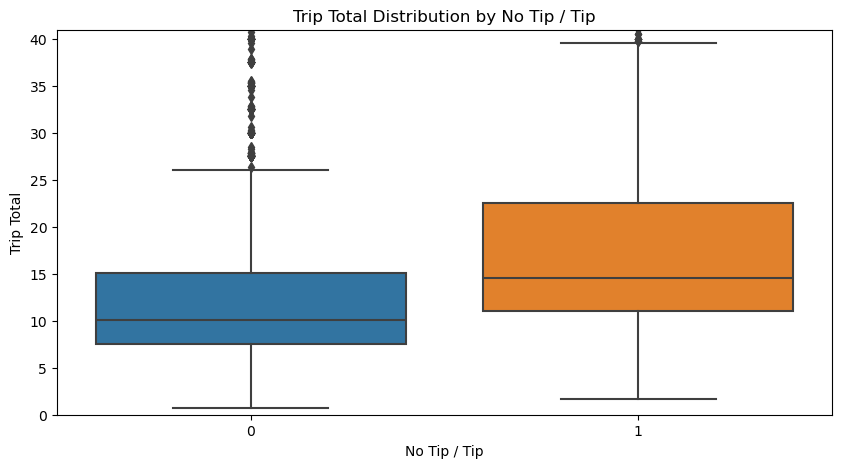

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=sampled_data, x='Tip Binary', y='Trip Total')
plt.title('Trip Total Distribution by No Tip / Tip')
plt.ylim(0,41)
plt.xlabel('No Tip / Tip')
plt.ylabel('Trip Total')
plt.show()

# Histogram of Additional Charges by No Tip / Tip

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(data=sampled_data, x='Additional Charges', hue='Tip Binary', kde=True, bins=20)
plt.title('Distribution of Additional Charges with and without Tip')
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')
plt.show()

c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


# Bar plot of shared trip authorized by No Tip / Tip

In [39]:
# convert to percentages
percentage_data = sampled_data.groupby(['Shared Trip Authorized', 'Tip Binary']).size().reset_index(name='Count')
total_counts = percentage_data.groupby('Shared Trip Authorized')['Count'].transform('sum')
percentage_data['Percentage'] = percentage_data['Count'] / total_counts * 100
# plot
plt.figure(figsize=(10, 5))
sns.barplot(data=percentage_data, x='Shared Trip Authorized', y='Percentage', hue='Tip Binary')
plt.title('Shared Trip Authorized by Tipping Status')
plt.xlabel('Shared Trip Authorized')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.grid(axis = 'y', linestyle='solid', linewidth=0.3)
plt.show()

# Scatter plot of Trip Miles vs Fare by Tip / No Tip

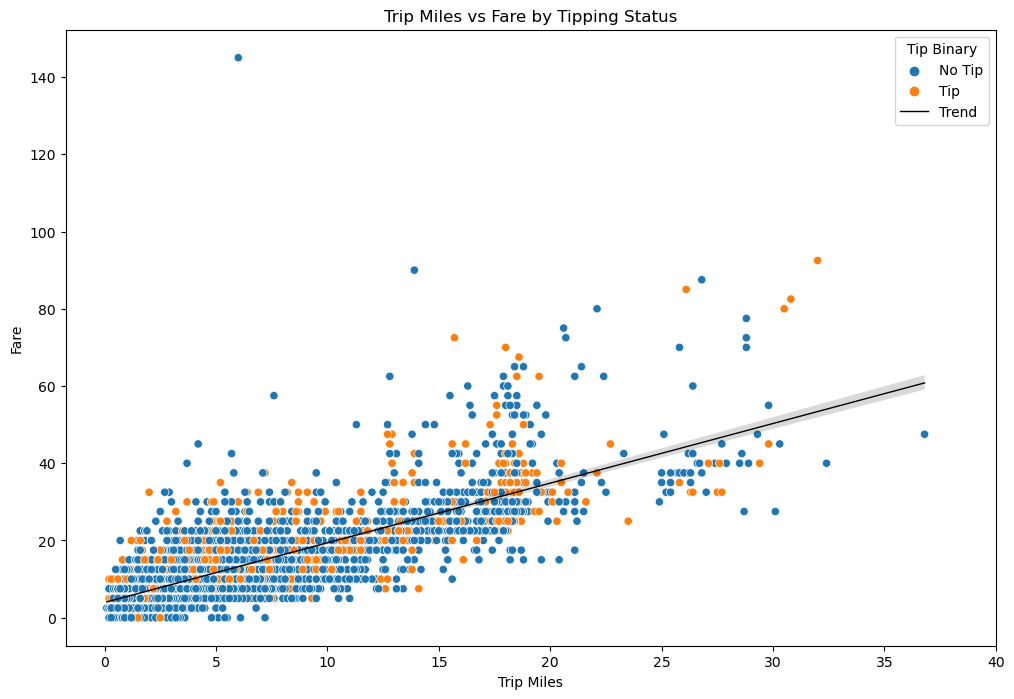

In [40]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=sampled_data, x='Trip Miles', y='Fare', hue='Tip Binary')
# trend
sns.regplot(data=sampled_data, x='Trip Miles', y='Fare', scatter=False, color='black',line_kws={'linewidth':1})
plt.title('Trip Miles vs Fare by Tipping Status')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
min_trip_miles = sampled_data['Trip Miles'].min()
max_trip_miles = sampled_data['Trip Miles'].max()
plt.xticks(ticks=np.arange(45, step=5))
legend_labels = ['No Tip', 'Tip']
handles, _ = scatter.get_legend_handles_labels()
handles.append(Line2D([0], [0], color='black', lw=1))
legend_labels.append('Trend')
plt.legend(handles, legend_labels, title='Tip Binary', loc='upper right')
plt.show()

# Histogram of Trip Total by Tip / No Tip


c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_

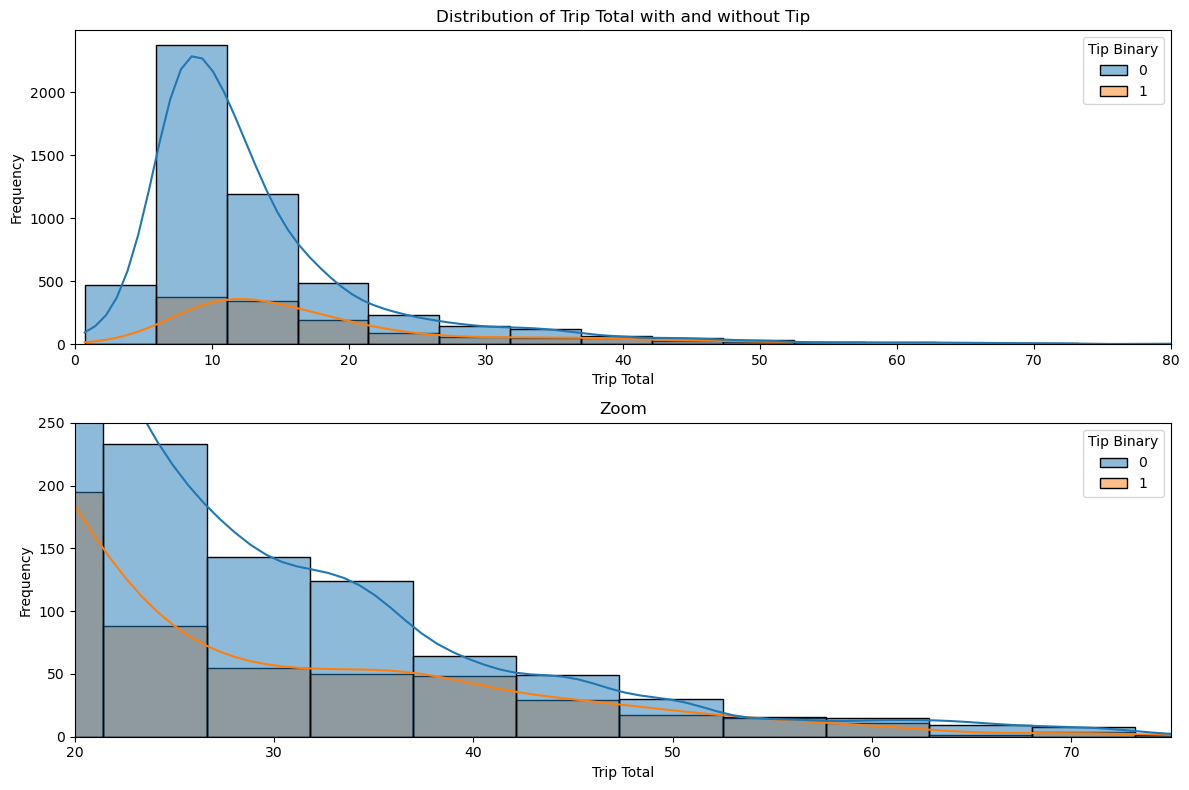

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(data=sampled_data, x='Trip Total', hue='Tip Binary', kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Trip Total with and without Tip')
axes[0].set_xlabel('Trip Total')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 80)

# zoom
sns.histplot(data=sampled_data, x='Trip Total', hue='Tip Binary', kde=True, bins=30, ax=axes[1])
axes[1].set_title('Zoom')
axes[1].set_xlabel('Trip Total')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 250)
axes[1].set_xlim(20, 75)

plt.tight_layout()
plt.show()

# Boxplot of Trip Total by Tip / No Tip per Weekday


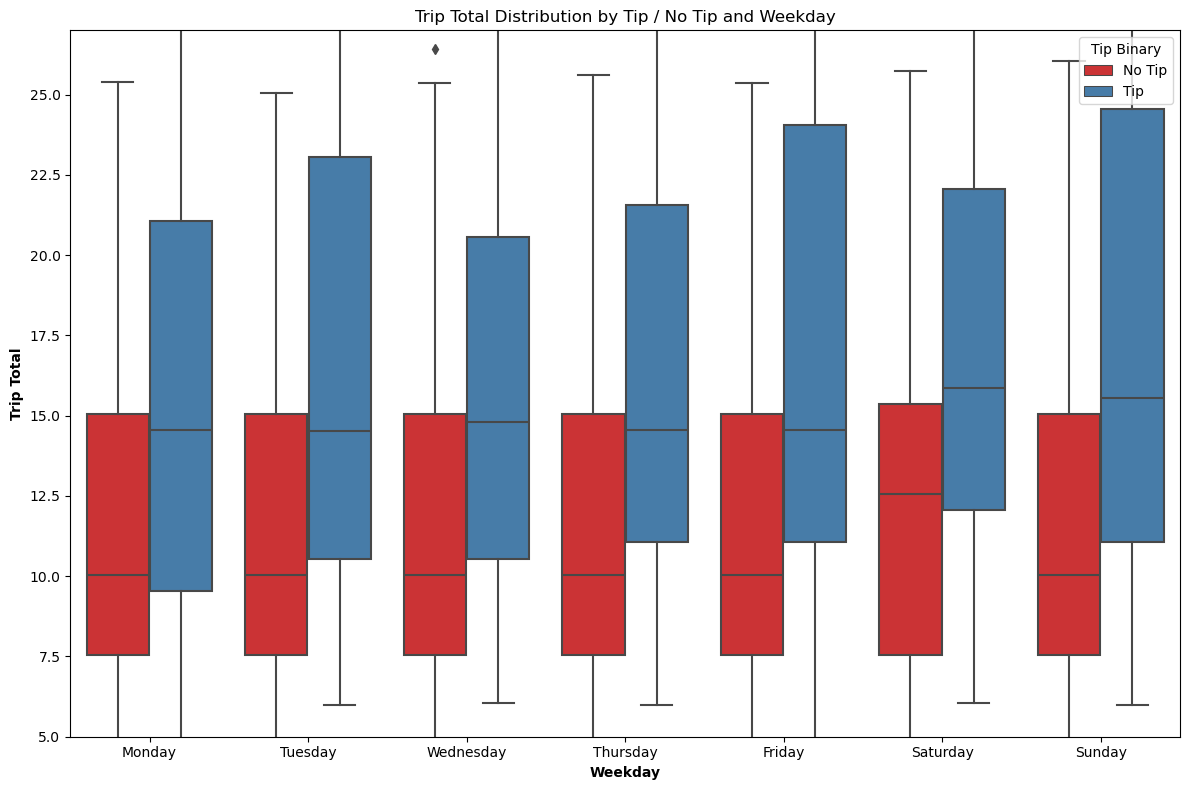

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=sampled_data, x='Weekday', y='Trip Total', hue='Tip Binary', palette='Set1')
plt.title('Trip Total Distribution by Tip / No Tip and Weekday')
plt.xlabel('Weekday',fontweight='bold')
plt.ylabel('Trip Total',fontweight='bold')
legend_labels = ['No Tip', 'Tip']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Tip Binary', loc='upper right')
# weekdays instead of numbers
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=np.arange(len(weekday_labels)), labels=weekday_labels)
plt.ylim(5,27) # remove this line to zoom out
plt.tight_layout()
plt.show()

# Chicago-Map all Pickup Locations


In [43]:
df = pd.DataFrame(combined_data_copy2["Pickup Centroid Location"])

# 1% of original dataframe
sample_df = df.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
sample_df["Pickup Centroid Location"] = sample_df["Pickup Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
sample_df["Latitude"] = sample_df["Pickup Centroid Location"].apply(lambda point: point.y if point else None)
sample_df["Longitude"] = sample_df["Pickup Centroid Location"].apply(lambda point: point.x if point else None)

# basic folium Map of Chicago
trip_heat_map = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=11, control_scale=True, max_zoom=20)

# HeatMap of Pickup Locations
heat_data = [[row['Latitude'], row['Longitude']] for index, row in sample_df.iterrows()]
trip_heat_map.add_child(plugins.HeatMap(heat_data, radius=20))

trip_heat_map

# Chicago-Map Pickup Locations by No Tip / Tip

In [44]:
combined_data_copy2_0 = combined_data_copy2[combined_data_copy2['Tip Binary'] == 0].copy()
combined_data_copy2_1 = combined_data_copy2[combined_data_copy2['Tip Binary'] == 1].copy()

df0 = pd.DataFrame(combined_data_copy2_0["Pickup Centroid Location"])
df1 = pd.DataFrame(combined_data_copy2_1["Pickup Centroid Location"])


# 1% of original dataframe
df_0 = df0.sample(frac=0.01, random_state=41)
df_1 = df1.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
df_0["Pickup Centroid Location"] = df_0["Pickup Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)
df_1["Pickup Centroid Location"] = df_1["Pickup Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
df_0["Latitude"] = df_0["Pickup Centroid Location"].apply(lambda point: point.y if point else None)
df_0["Longitude"] = df_0["Pickup Centroid Location"].apply(lambda point: point.x if point else None)
df_1["Latitude"] = df_1["Pickup Centroid Location"].apply(lambda point: point.y if point else None)
df_1["Longitude"] = df_1["Pickup Centroid Location"].apply(lambda point: point.x if point else None)

# Create map 0
trip_heat_map0 = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)

heat_data0 = [[row['Latitude'], row['Longitude']] for index, row in df_0.iterrows()]
trip_heat_map0.add_child(plugins.HeatMap(heat_data0, radius=20))

# Create map 1
trip_heat_map1 = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)

heat_data1 = [[row['Latitude'], row['Longitude']] for index, row in df_1.iterrows()]
trip_heat_map1.add_child(plugins.HeatMap(heat_data1, radius=20))

# html to display maps next to eachother
html = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="flex: 1; margin-right: 10px;">
        <h3 style="text-align: center;">No Tip</h3>
        {trip_heat_map0._repr_html_()}
    </div>
    <div style="flex: 1; margin-left: 10px;">
        <h3 style="text-align: center;">Tip</h3>
        {trip_heat_map1._repr_html_()}
    </div>
</div>
"""
display(HTML(html))

# Chicago-Map all Dropoff Locations


In [45]:
df = pd.DataFrame(combined_data_copy["Dropoff Centroid Location"])

# 1% of original dataframe
sample_df = df.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
sample_df["Dropoff Centroid Location"] = sample_df["Dropoff Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
sample_df["Latitude"] = sample_df["Dropoff Centroid Location"].apply(lambda point: point.y if point else None)
sample_df["Longitude"] = sample_df["Dropoff Centroid Location"].apply(lambda point: point.x if point else None)

# basic folium Map of Chicago
trip_heat_map = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=11, control_scale=True, max_zoom=20)

# HeatMap of Dropoff Locations
heat_data = [[row['Latitude'], row['Longitude']] for index, row in sample_df.iterrows()]
trip_heat_map.add_child(plugins.HeatMap(heat_data, radius=20))

trip_heat_map

# Chicago-Map Dropoff Locations by No Tip / Tip

In [46]:
combined_data_copy2_0 = combined_data_copy[combined_data_copy['Tip Binary'] == 0].copy()
combined_data_copy2_1 = combined_data_copy[combined_data_copy['Tip Binary'] == 1].copy()

df0 = pd.DataFrame(combined_data_copy2_0["Dropoff Centroid Location"])
df1 = pd.DataFrame(combined_data_copy2_1["Dropoff Centroid Location"])


# 1% of original dataframe
df_0 = df0.sample(frac=0.01, random_state=41)
df_1 = df1.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
df_0["Dropoff Centroid Location"] = df_0["Dropoff Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)
df_1["Dropoff Centroid Location"] = df_1["Dropoff Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
df_0["Latitude"] = df_0["Dropoff Centroid Location"].apply(lambda point: point.y if point else None)
df_0["Longitude"] = df_0["Dropoff Centroid Location"].apply(lambda point: point.x if point else None)
df_1["Latitude"] = df_1["Dropoff Centroid Location"].apply(lambda point: point.y if point else None)
df_1["Longitude"] = df_1["Dropoff Centroid Location"].apply(lambda point: point.x if point else None)

# Create map 0
trip_heat_map0 = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)

heat_data0 = [[row['Latitude'], row['Longitude']] for index, row in df_0.iterrows()]
trip_heat_map0.add_child(plugins.HeatMap(heat_data0, radius=20))

# Create map 1
trip_heat_map1 = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)

heat_data1 = [[row['Latitude'], row['Longitude']] for index, row in df_1.iterrows()]
trip_heat_map1.add_child(plugins.HeatMap(heat_data1, radius=20))

# html to display maps next to eachother
html = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="flex: 1; margin-right: 10px;">
        <h3 style="text-align: center;">No Tip</h3>
        {trip_heat_map0._repr_html_()}
    </div>
    <div style="flex: 1; margin-left: 10px;">
        <h3 style="text-align: center;">Tip</h3>
        {trip_heat_map1._repr_html_()}
    </div>
</div>
"""
display(HTML(html))

# Classification Predicitions

Base Feature Selection

- We selected the features based on their correlation with Tip Binary:

Correlations

- If two or more features are closely related we will only focus on the feature that has the highest correlation (e.g. 'Trip Total','Additional Charges','Fare' or 'Trips Pooled ','Shared Trip Authorized').

Final Feature Selection:

- For each model we tried every combination of features with |correlation| > 1%. The combination of the two unrelated features 'Trip Total' and 'Shared Trip Authorized' showed by far the best results in every model. Adding additional features resulted in worse performance by at least 5%. Additionally, adding features lead to the models predicting "No Tip" every time, resulting in an accuracy of around 80% regardless of the models parameters. Since this is definetly not the result we desire all our final models are beased on the features 'Trip Total' and 'Shared Trip Authorized'.

Data Samlpes:

- Since we have a lot of data, randomly sampling the data is necessary. This speeds up compiling and minimizes the memory usage.
- We tried to include the highest amount of data possible, while still providing reasonable performance. This lead to a sample size of around 1%.
- Different fractions and random states might lead to different results.


# KNN Classification

- KNN sample:

In [47]:
sampled_data_knn = usableData.sample(frac=0.01, random_state=40)
sampled_data_knn.fillna(sampled_data.mean(), inplace=True) # will work without this line of code since their should be 0 missing values.
knn_data = sampled_data_knn.copy()

- KNN Classification with Cross-Validation and GridSearchCV for k-Optimization


In [48]:
features = [
    'Trip Total',
    'Shared Trip Authorized',
]

# target
target = 'Tip Binary'
X = knn_data[features]
y = knn_data[target]

# Train-Test-Holdout Split (50-20-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN with GridSearch Cross-Validation for k-Optimization
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best k:", knn_cv.best_params_)
print("Best cross-validation accuracy:", knn_cv.best_score_)

# Prediction on Test-Data
y_pred = knn_cv.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best k: {'n_neighbors': 6}
Best cross-validation accuracy: 0.9592449860295036
Test set accuracy: 0.9592687950566426
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     15633
           1       0.95      0.84      0.89      3787

    accuracy                           0.96     19420
   macro avg       0.96      0.91      0.93     19420
weighted avg       0.96      0.96      0.96     19420



- KNN Classification for best k to validate previous results


In [49]:
def find_knn(X, y, max_k):
    err_train = []
    err_test = []
    err_hold = []
    
    # Train-Test-Holdout Split (50-20-30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
    X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)
    
    # normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_hold = scaler.transform(X_hold)
    
    for n in np.arange(1, max_k):
        # KNN training
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        # Prediction and Error calculation
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        y_hold_pred = knn.predict(X_hold)
        
        err_train.append(accuracy_score(y_train, y_train_pred))
        err_test.append(accuracy_score(y_test, y_test_pred))
        err_hold.append(accuracy_score(y_hold, y_hold_pred))
        
    # Plot Errors
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, max_k), err_train, np.arange(1, max_k), err_test, np.arange(1, max_k), err_hold)
    plt.legend(["Training", "Validation", "Holdout"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("Error rate (accuracy)")
    plt.title("KNN Classification Error Rates")
    plt.show()

    # Evaluation on Holdout-Data
    y_hold_pred = knn.predict(X_hold)
    holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
    print("\nEvauation on Holdout-Data")
    print(f"Holdout set accuracy: {holdout_accuracy}")
    print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))



- Plot n_neighbors for KNN


In [50]:
features = ['Trip Total', 'Shared Trip Authorized']
target = 'Tip Binary'
X = knn_data[features]
y = knn_data[target]
find_knn(X, y, max_k=15)


Evauation on Holdout-Data
Holdout set accuracy: 0.9562833088746427
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10325
           1       0.94      0.84      0.89      2622

    accuracy                           0.96     12947
   macro avg       0.95      0.91      0.93     12947
weighted avg       0.96      0.96      0.96     12947



# RBF Classification


- RBF sample:

In [51]:
sampled_data_RBF = usableData.sample(frac=0.002, random_state=24)
sampled_data_RBF.fillna(sampled_data.mean(), inplace=True) # will work without this line of code since their should be 0 missing values.
RBF_data = sampled_data_RBF.copy()

- Best RBF model

In [52]:
features = ['Trip Total','Shared Trip Authorized']
target = 'Tip Binary'

X = RBF_data[features]
y = RBF_data[target]

# Train-Test-Holdout Split (50-20-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold = scaler.transform(X_hold)

# Hyperparameter-Optimization and Training
param_grid = {
    'C': [1,2,5,10,50,100 ],
    'gamma': [100000,10000,1000,100,10,1,0.1,0.01,0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train, y_train)

# Best Parameters and Model
best_model = grid.best_estimator_
print(f"Best model parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=10

- Evaluation on Test-Data


In [53]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

Test set accuracy: 0.9523686920700309
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3141
           1       0.92      0.82      0.87       743

    accuracy                           0.95      3884
   macro avg       0.94      0.90      0.92      3884
weighted avg       0.95      0.95      0.95      3884



- Evaluation on Holdout-Data


In [54]:
y_hold_pred = best_model.predict(X_hold)
holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
print(f"Holdout set accuracy: {holdout_accuracy}")
print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))

Holdout set accuracy: 0.9586872586872587
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2064
           1       0.94      0.85      0.89       526

    accuracy                           0.96      2590
   macro avg       0.95      0.92      0.93      2590
weighted avg       0.96      0.96      0.96      2590



# Random Forest Classification


In [55]:
sampled_data_rForrest = usableData.sample(frac=0.01, random_state=35)
sampled_data_rForrest.fillna(sampled_data.mean(), inplace=True) # will work without this line of code since their should be 0 missing values.
rForrest_data = sampled_data_rForrest.copy()
XRForrest = np.array(rForrest_data[['Shared Trip Authorized','Trip Total']])
YRForrest = rForrest_data['Tip Binary'].values
X_train, X_test, y_train, y_test = train_test_split(XRForrest, YRForrest, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

- Hyperparameter-Optimization and Training


In [56]:
best_model = None
best_accuracy = 0

for n_estimators in [50, 100, 150]:
    for max_depth in [10, 20, 30, 40, 50, None]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=24)
        model.fit(X_train, y_train)
        
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
print(f"Best model parameters: n_estimators={best_model.n_estimators}, max_depth={best_model.max_depth}")
print(f"Best cross-validation accuracy: {best_accuracy}")

Best model parameters: n_estimators=100, max_depth=30
Best cross-validation accuracy: 0.962152420185376


- Confusion Matrix on Test-Data

In [57]:
confusion_matrix(y_test,best_model.predict(X_test))

array([[15387,   142],
       [  593,  3298]], dtype=int64)

- Classification Accuracy on Test-Data

In [58]:
accuracy_score(y_test,best_model.predict(X_test))

0.962152420185376

- Evaluation on Holdout-Data


In [59]:
y_hold_pred = best_model.predict(X_hold)
holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
print(f"Holdout set accuracy: {holdout_accuracy}")
print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))

Holdout set accuracy: 0.9624623464895342
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     10427
           1       0.96      0.84      0.90      2520

    accuracy                           0.96     12947
   macro avg       0.96      0.92      0.94     12947
weighted avg       0.96      0.96      0.96     12947



# Final Results

- Each model achieved an accuracy of about 95% on the Holdout-Data.
